In [8]:
## Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Enter the CFL Value : 1.0
Enter the initial condition you want to use (A, B, C, D, E): B
Enter the difference scheme you want to use (FTFS, FTCS, FTBS, LW, BW, FR): FTCS


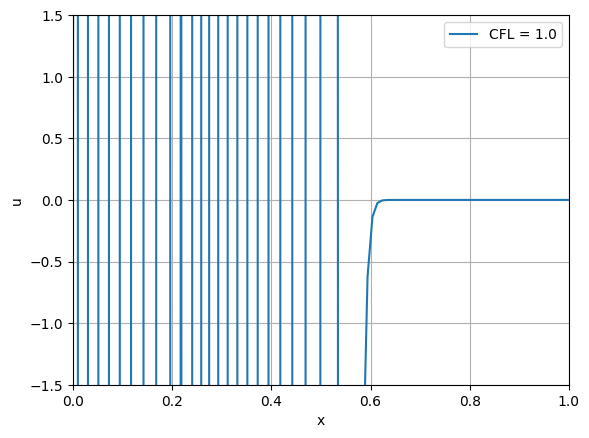

<Figure size 640x480 with 0 Axes>

In [9]:
## Advection Equation Numerical Simulation

# Set wave speed
a = 1.0   #m/s

#Courant_Friedrich_Lewy Numbers (0.5, 1.0, 1.5)
cfl_list = list(map(float, input("Enter the CFL Value : ").split()))

# Set total time for solution evolution and spatial and temporal step sizes
t_final = 0.35 #s
x_range = np.linspace(0, 1, 102)
dx = x_range[1] - x_range[0]      #Spatial Steps
dt = cfl_list[0]*dx/a             #Temporal Steps

#boundary conditions
u = np.zeros(102)
u[0] = u[101] = 0.0

#Defining Various Difference Scheme

def FTFS(u, a, dt, dx,):
  unew = u.copy()
  for k in range(1, 101):
    unew[k] = u[k] - (a*dt/dx)*(u[k+1] - u[k])
  return unew

def FTCS(u, a, dt, dx):
  unew = u.copy()
  for k in range(1, 101):
    unew[k] = u[k] - ((a/2)*dt/dx)*(u[k+1] - u[k-1])
  return unew

def FTBS(u, a, dt, dx):
  unew = u.copy()
  for k in range(1, 101):
    unew[k] = u[k] - (a*dt/dx)*(u[k+1] - u[k])
  return unew

def LW(u, a, dt, dx):
  unew = u.copy()
  for k in range(1, 101):
    unew[k] = u[k] - ((a*dt)/(2*dx))*(u[k+1]-u[k-1]) + ((a*dt**2)/(2*dx**2))*(u[k+1]-2*u[k]+u[k-1])
  return unew

def BW(u, a, dt, dx):
  unew = u.copy()
  for k in range(1, 101):
    unew[k] = u[k] - ((a/2)*dt/dx)*(3*u[k]-4*u[k-1]+u[k-2]) + (((a*dt/dx)**2)/2)*(u[k]-2*u[k-1]+u[k-2])
  return unew

def FR(u, a, dt, dx):
  unew = u.copy()
  lw = LW(u, a, dt, dx)
  bw = BW(u, a, dt, dx)
  for k in range(1, 101):
      unew[k] = 0.5 * (lw[k] + bw[k])
  return unew

initial_condition = input("Enter the initial condition you want to use (A, B, C, D, E): ")

if initial_condition == "A":               # A = Disconitnuous Solution
    u = np.zeros(len(x_range))
    u[x_range <= 0.2] = 1

elif initial_condition == "B":            # B = Sinusoidal Solution having Two Periods
    u = np.zeros(len(x_range))
    u[(x_range >= 0.05) & (x_range < 0.35)] = np.sin(4*np.pi*(x_range[(x_range >= 0.05) & (x_range < 0.35)]-0.05)/0.3)

elif initial_condition == "C":            # C = Sinusoidal Solution having Four Periods
    u = np.zeros(len(x_range))
    u[(x_range >= 0.05) & (x_range < 0.35)] = np.sin(8*np.pi*(x_range[(x_range >= 0.05) & (x_range < 0.35)]-0.05)/0.3)

elif initial_condition == "D":            # D = Sinusoidal Solution having Six Periods
    u = np.zeros(len(x_range))
    u[(x_range >= 0.05) & (x_range < 0.35)] = np.sin(12*np.pi*(x_range[(x_range >= 0.05) & (x_range < 0.35)]-0.05)/0.3)

elif initial_condition == "E":            # E = Gaussian Curve where Sigma is 0.4
    u = np.zeros(len(x_range))
    u = np.exp(-50*((x_range - 0.2)/0.4)**2)


diff_scheme = input("Enter the difference scheme you want to use (FTFS, FTCS, FTBS, LW, BW, FR): ")

# Evolve solution for different CFL numbers
for i, cfl in enumerate(cfl_list):
    dt = cfl*dx/a
    t = 0
    nsteps = int(t_final/dt)       # added time steps
    for j in range(nsteps):
        if diff_scheme == "FTFS":      #FTFS = Forward Time Forward Space Scheme
            u = FTFS(u, a, dt, dx)
        elif diff_scheme == "FTCS":    #FTCS = Forward Time Central Space Scheme
            u = FTCS(u, a, dt, dx)
        elif diff_scheme == "FTBS":    #FTBS = Forward Time Backward Space Scheme
            u = FTBS(u, a, dt, dx)
        elif diff_scheme == "LW":      #LW = Lex-Wendroff Scheme
            u = LW(u, a, dt, dx)
        elif diff_scheme == "BW":      #BW = Beam-Warming Scheme
            u = BW(u, a, dt, dx)
        elif diff_scheme == "FR":      #FR = Fromm Scheme
            u = FR(u, a, dt, dx)

    plt.plot(x_range, u, label='CFL = {}'.format(cfl))
    plt.legend()
    plt.xlim(0, 1)
    plt.ylim(-1.5, 1.5)
    plt.xlabel('x')
    plt.ylabel('u')
    plt.grid()
    plt.show()
    plt.clf()


#The code provided defines several functions that are used to perform numerical simulations of the advection equation using different numerical schemes.
#The advection equation describes the motion of a fluid in one dimension, and the code uses the finite difference method to approximate the solution of the equation at discrete points in space and time.
#The numerical schemes implemented include FTFS (forward-time, forward-space), FTCS (forward-time, central-space), FTBS (forward-time, backward-space), Lax-Wendroff, Beam-Warming, and the Fromm scheme.
#The code also defines several test cases for the initial condition and allows the user to select which one to use for the simulation.
#The code uses NumPy and Matplotlib libraries for numerical computation and visualization.

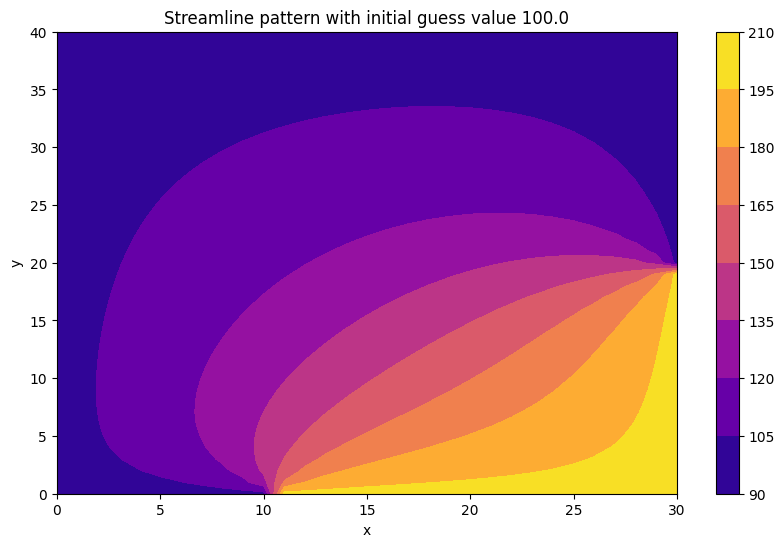

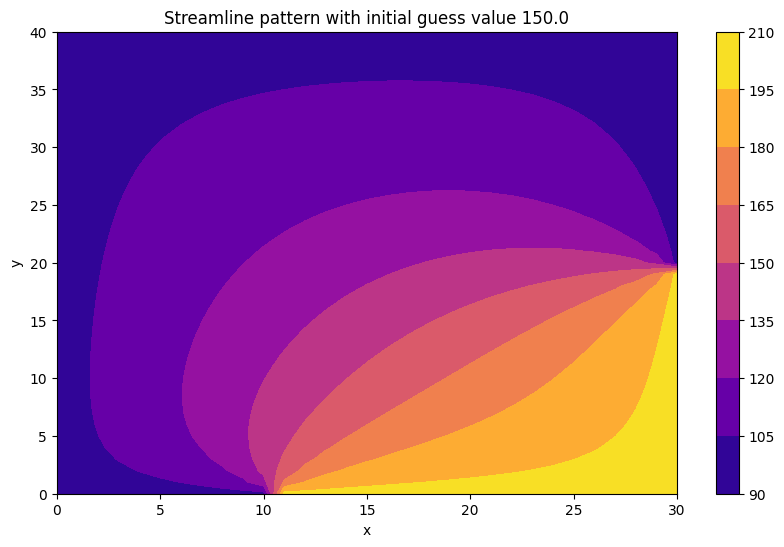

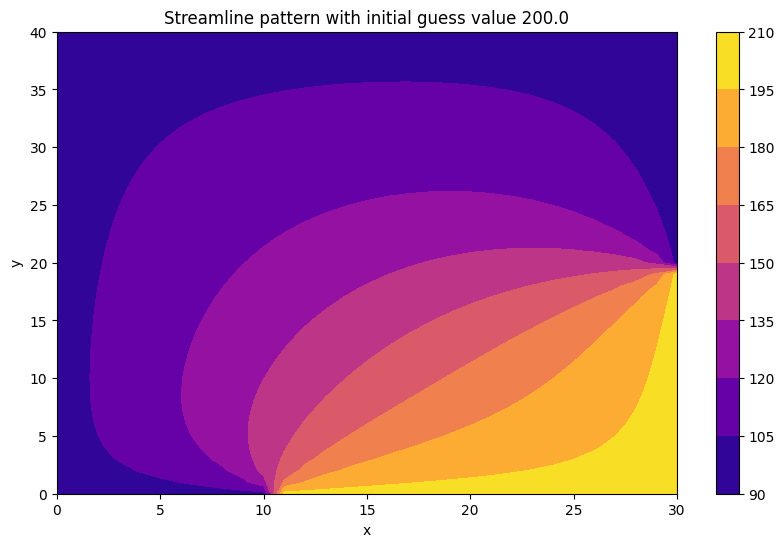

Solution for ψ(x,y) with initial guess value 100.0:
Number of iterations: 314
Data for psi_a:
    x=0.0       x=0.1       x=0.2       x=0.3       x=0.4       x=0.5  \
0   100.0  100.000000  100.000000  100.000000  100.000000  100.000000   
1   100.0  100.536843  101.106780  101.748726  102.516376  103.493868   
2   100.0  101.041739  102.143533  103.374539  104.826475  106.634539   
3   100.0  101.488564  103.054438  104.784113  106.786405  109.209700   
4   100.0  101.860876  103.806242  105.927602  108.333614  111.160507   
5   100.0  102.152275  104.388030  106.794733  109.470449  112.528222   
6   100.0  102.364512  104.806064  107.402825  110.237843  113.399507   
7   100.0  102.504726  105.077227  107.784203  110.693190  113.871001   
8   100.0  102.582825  105.223311  107.976573  110.896153  114.031715   
9   100.0  102.609518  105.266989  108.016960  110.901252  113.956594   
10  100.0  102.595049  105.229409  107.938567  110.754937  113.705760   
11  100.0  102.548530  105.129

In [10]:
## Point Jacobi Iterative Method for Stream Function

# Define parameters
dx = dy = 0.1
nx = int(3.0/dx) + 1
ny = int(4.0/dy) + 1

# Initialize stream function
psi_a = np.ones((ny, nx)) * 100.0
psi_b = np.ones((ny, nx)) * 150.0
psi_c = np.ones((ny, nx)) * 200.0

# Set boundary conditions
psi_a[:, 0] = 100.0      #Left wall
psi_a[-1, :] = 100.0     #Bottom wall
psi_a[0,:] = 100.0     #Bottom wall
psi_a[:,-1] = 100
psi_a[0,11: ] = 200
psi_a[0:20,-1] = 200     #Right Wall

psi_b[:, 0] = 100.0      #Left wall
psi_b[-1, :] = 100.0     #Bottom wall
psi_b[0,:] = 100.0     #Bottom wall
psi_b[:,-1] = 100
psi_b[0,11: ] = 200
psi_b[0:20,-1] = 200     #Right Wall

psi_c[:, 0] = 100.0      #Left wall
psi_c[-1, :] = 100.0     #Bottom wall
psi_c[0,:] = 100.0     #Bottom wall
psi_c[:,-1] = 100
psi_c[0,11: ] = 200
psi_c[0:20,-1] = 200     #Right Wall

# Implement Point Jacobi iterative method
def point_jacobi(psi):
    error = 1.0
    niter = 0
    while error > 1e-4:
        psi_old = psi.copy()
        for i in range(1, ny-1):
            for j in range(1, nx-1):
              psi[i, j] = 0.25 * (psi[i+1, j] + psi[i-1, j] + psi[i, j+1] + psi[i, j-1])
        error = np.linalg.norm(psi - psi_old) / np.linalg.norm(psi)
        niter += 1
    return psi, niter

# Solve for stream function using Point Jacobi method
psi_a, niter_a = point_jacobi(psi_a)
psi_b, niter_b = point_jacobi(psi_b)
psi_c, niter_c = point_jacobi(psi_c)

#Create contour plot for converged solution with initial guess 100.0
plt.figure(figsize=(10, 6))
plt.contourf(psi_a, cmap='plasma')
plt.title("Streamline pattern with initial guess value 100.0")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()

#Create contour plot for converged solution with initial guess 150.0
plt.figure(figsize=(10, 6))
plt.contourf(psi_b, cmap='plasma')
plt.title("Streamline pattern with initial guess value 150.0")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()

#Create contour plot for converged solution with initial guess 200.0
plt.figure(figsize=(10, 6))
plt.contourf(psi_c, cmap='plasma')
plt.title("Streamline pattern with initial guess value 200.0")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()

# Save the results to CSV files
df_a = pd.DataFrame(psi_a, columns=["x={}".format(round(i*dx, 2)) for i in range(nx)])
df_a.to_csv("psi_a.csv", index=False)

df_b = pd.DataFrame(psi_b, columns=["x={}".format(round(i*dx, 2)) for i in range(nx)])
df_b.to_csv("psi_b.csv", index=False)

df_c = pd.DataFrame(psi_c, columns=["x={}".format(round(i*dx, 2)) for i in range(nx)])
df_c.to_csv("psi_c.csv", index=False)

# Display psi data in tabular form
print("Solution for ψ(x,y) with initial guess value 100.0:")
print("Number of iterations:", niter_a)
print("Data for psi_a:")
print(df_a)

print("Solution for ψ(x,y) with initial guess value 150.0:")
print("Number of iterations:", niter_b)
print("Data for psi_b:")
print(df_b)

print("Solution for ψ(x,y) with initial guess value 200.0:")
print("Number of iterations:", niter_c)
print("Data for psi_c:")
print(df_c)

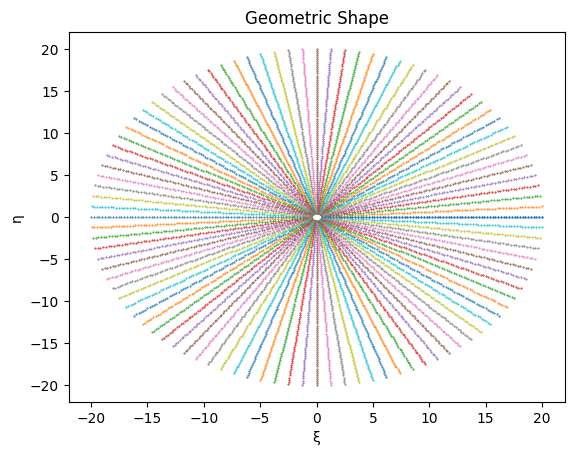

In [11]:
# Grid Generation for Transfinite interpolation

# Define the number of points in the x and y directions
num_x_points, num_y_points = 101, 81

# Generate a grid of points in the x and y directions
ξ, η = np.meshgrid(np.linspace(0, 1, num_x_points), np.linspace(0, 1, num_y_points))

# Define the x and y coordinates of the points on a spiral
x_coords = ((1/2)+(39/2)*η)*np.cos(2*np.pi*ξ)
y_coords = ((1/2)+(39/2)*η)*np.sin(2*np.pi*ξ)

# Plot the points on the spiral
plt.plot(x_coords, y_coords, '.', markersize=1, alpha=1)
plt.xlabel('ξ')
plt.ylabel('η')
plt.title("Geometric Shape")
plt.show()